## PCA 2D projection 

This takes multidimensional data and makes a 2D projection using PCA. It leans on the site: 
    https://builtin.com/machine-learning/pca-in-python

In [3]:
import pandas as pd

df = pd.read_csv("/Users/EricJeong/Downloads/archive/players_22.csv",low_memory=False)
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


### Split into goal keeper and non-goal keeper players

In [4]:
df_GK = df.loc[df['player_positions'] == 'GK']
df_P = df.loc[df['player_positions'] != 'GK']
df_P.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


### List the columns to aid with extracting data 

In [5]:
# list(df.columns)

In [6]:
fifaData_GK = df[['overall',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']].values

print('Goal Keeper data to cluster')
print(fifaData_GK)

fifaData_P = df_P[['overall',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle']].values

print('\nNon Goal Keeper data to cluster')
print(fifaData_P)
#pd.DataFrame(fifaData_P).to_csv('fifaDataPlayer.csv')  


Goal Keeper data to cluster
[[93  6 11 15 14  8]
 [92 15  6 12  8 10]
 [91  7 11 15 14 11]
 ...
 [47  8  6  7 10  6]
 [47  7 10  7 14 15]
 [47  8 13 13  9 14]]

Non Goal Keeper data to cluster
[[93. 85. 92. ... 20. 35. 24.]
 [92. 78. 92. ... 35. 42. 19.]
 [91. 87. 94. ... 24. 32. 24.]
 ...
 [47. 60. 37. ... 38. 44. 48.]
 [47. 68. 46. ... 10. 14. 11.]
 [47. 68. 38. ... 33. 31. 37.]]


In [7]:
# Working from: https://builtin.com/machine-learning/pca-in-python

from sklearn.preprocessing import StandardScaler

# DO THIS if your data isn't on the same scale
# fifaData = StandardScaler().fit_transform(fifaData)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(fifaData_P)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,160.919153,54.151490
1,125.996789,62.021523
2,145.821323,47.320932
3,143.632138,50.462409
4,104.633052,111.354462


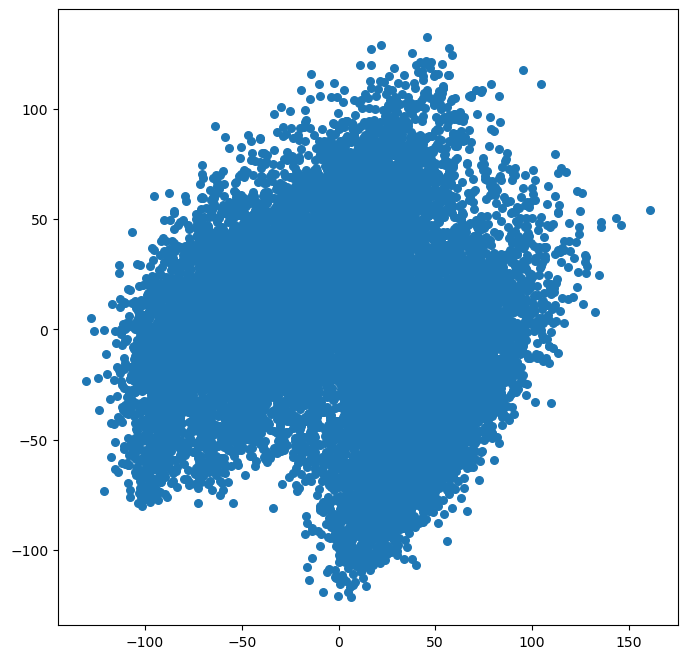

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2']
               , s = 30)

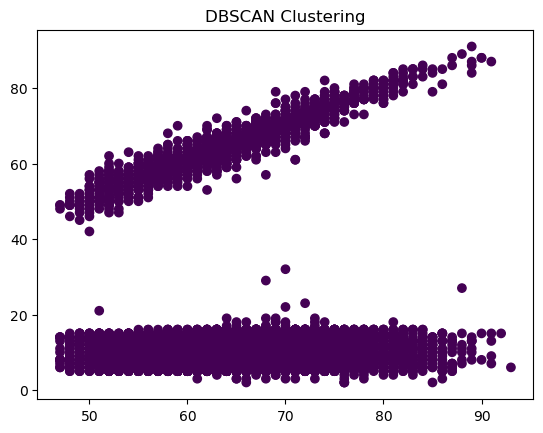

Number of outliers: 19239
Outlier points:
[93. 85. 92. 91. 95. 34. 65. 85. 95. 70. 91. 88. 96. 93. 94. 91. 96. 91.
 80. 91. 94. 95. 86. 68. 72. 69. 94. 44. 40. 93. 95. 75. 96. 20. 35. 24.]
[92. 78. 92. 79. 86. 44. 82. 71. 95. 90. 85. 89. 85. 79. 85. 70. 88. 77.
 79. 77. 93. 82. 90. 85. 76. 86. 87. 81. 49. 95. 81. 90. 88. 35. 42. 19.]
[91. 87. 94. 80. 88. 34. 75. 87. 95. 90. 80. 86. 88. 81. 84. 77. 88. 85.
 88. 86. 94. 74. 94. 95. 77. 77. 93. 63. 29. 95. 76. 88. 95. 24. 32. 24.]
[91. 91. 83. 86. 94. 37. 63. 85. 83. 63. 86. 86. 95. 88. 87. 81. 95. 93.
 89. 96. 89. 84. 80. 64. 81. 53. 81. 63. 37. 86. 90. 93. 93. 35. 32. 29.]
[91. 76. 86. 93. 88. 64. 78. 94. 82. 55. 94. 82. 88. 85. 83. 93. 91. 76.
 76. 79. 91. 78. 91. 63. 89. 74. 91. 76. 66. 88. 94. 83. 89. 68. 65. 53.]
[91. 97. 88. 80. 92. 36. 77. 78. 93. 72. 85. 83. 93. 80. 69. 71. 91. 97.
 97. 92. 93. 83. 86. 78. 88. 77. 82. 62. 38. 92. 82. 79. 88. 26. 34. 32.]
[90. 70. 91. 83. 83. 47. 83. 80. 94. 86. 85. 88. 83. 83. 65. 86. 85. 65.
 74

IndexError: index 17107 is out of bounds for axis 0 with size 17107

In [28]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps=1, min_samples=5).fit(fifaData_GK)
labels = clustering.labels_
plt.scatter(fifaData_GK[:, 0], fifaData_GK[:, 1], c=labels)
plt.title('DBSCAN Clustering')
plt.show()


outlier_indices = np.where(labels == -1)[0]
num_outliers = len(outlier_indices)
print("Number of outliers:", num_outliers)

print("Outlier points:")
for index in outlier_indices:
    print(fifaData_P[index])